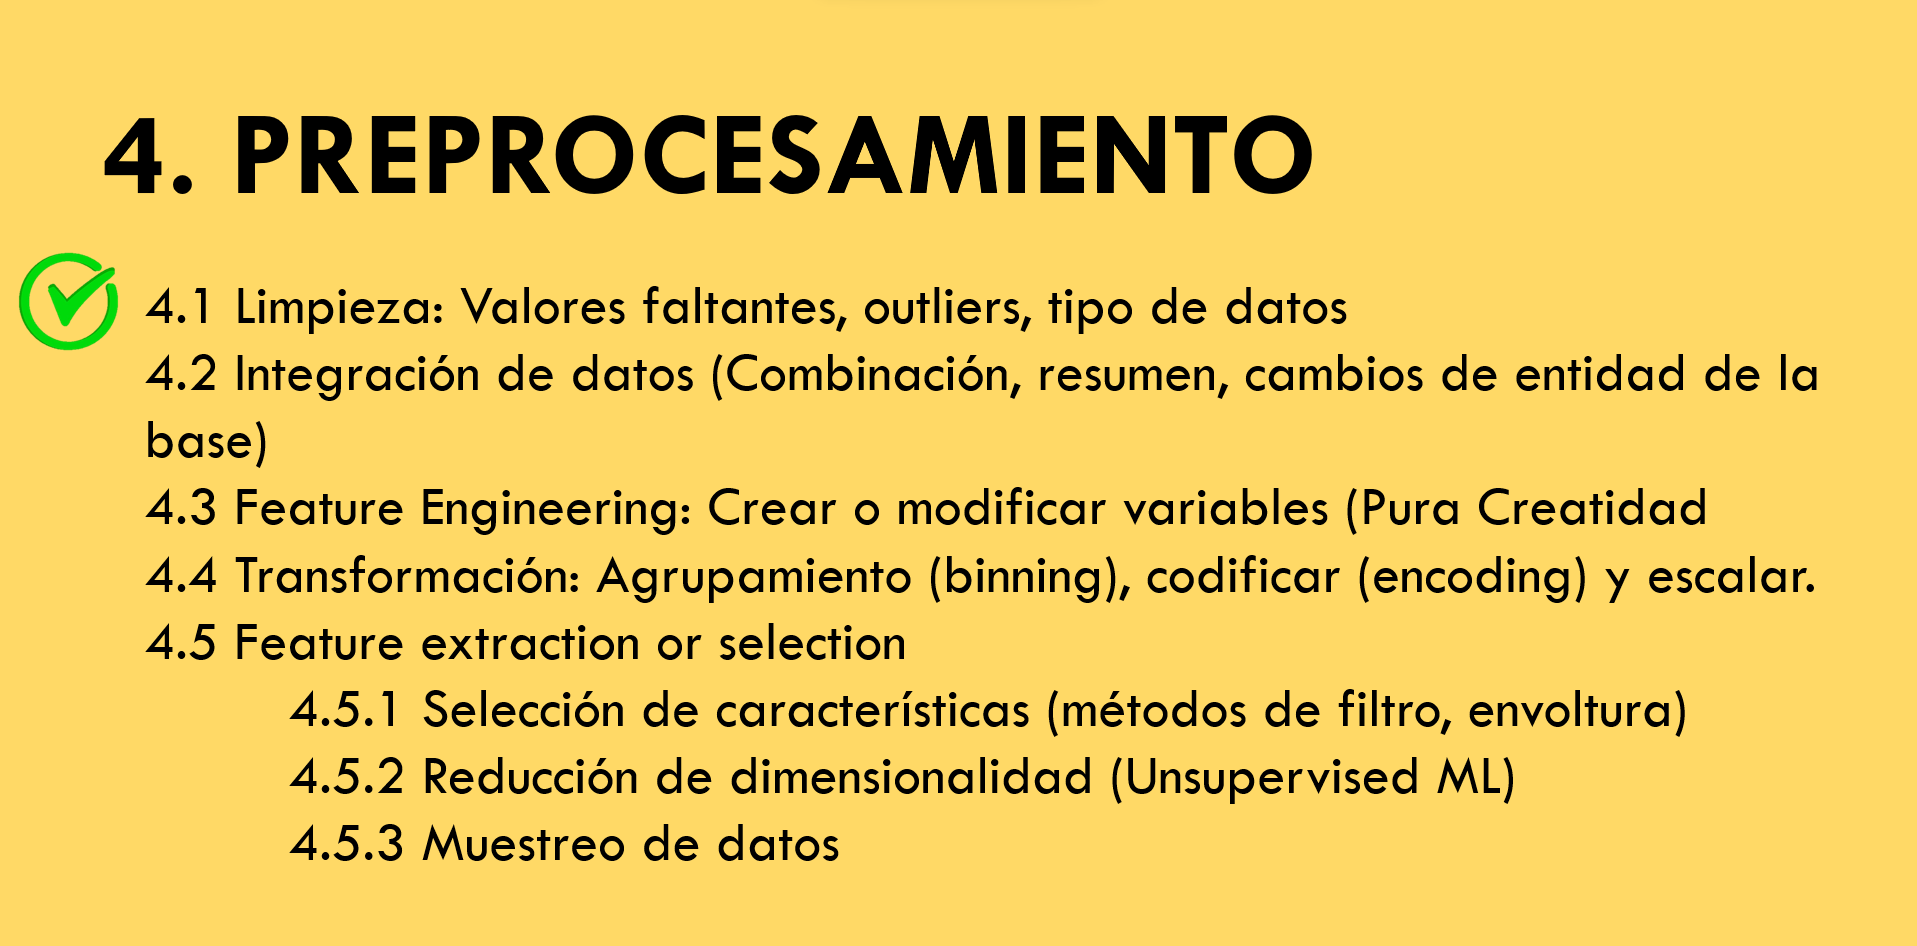

# Limpieza de datos


La mayor칤a de los datos del mundo real con los que trabajamos son datos sin procesar, lo que significa que pueden contener entradas de informaci칩n repetidas, faltantes e irrelevantes. Por lo tanto, si estos datos se utilizan en cualquier an치lisis de aprendizaje autom치tico, se obtendr치 una precisi칩n baja o una predicci칩n incorrecta. 
Por esta raz칩n, la limpieza de datos, tambi칠n conocida como limpieza de datos, es una t칠cnica importante que viene antes de cualquier construcci칩n de modelo.

En este cuaderno, veremos algunas de las t칠cnicas comunes de limpieza de datos que los cient칤ficos de datos pueden utilizar para preparar sus datos para el an치lisis.

## Objetivos

* Manejar los duplicados.
* Manejar los valores faltantes.
* Manejar los valores at칤picos.

***


## **Setup**


Para esta pr치ctica de laboratorio, usaremos las siguientes bibliotecas:
  - [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork837-2023-01-01) para gestionar los datos .
  - [`numpy`](https://numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork837-2023-01-01) para operaciones matem치ticas.
  - [`seaborn`](https://seaborn.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork837-2023-01-01) para visualizar el datos.
  - [`matplotlib`](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork837-2023-01-01) para visualizar los datos.
  - [`sklearn`](https://scikit-learn.org/stable/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork837-2023-01-01) para aprendizaje autom치tico y funciones relacionadas con el canal de aprendizaje.
  - [`scipy`](https://scipy.org/) para c치lculos estad칤sticos.

In [1]:
#Esto nos evita algunas advertencias que ocupan espacios, pero no es necesario
import warnings 
warnings.filterwarnings('ignore')

In [1]:
import pandas as pd
import numpy as np 

import seaborn as sns 
import matplotlib.pylab as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from scipy.stats import norm
from scipy import stats

## **Leer y comprender nuestros datos**


Para esta pr치ctica de laboratorio, utilizaremos el archivo Ames_Housing_Data.tsv, alojado en el almacenamiento de objetos de IBM Cloud. El conjunto de datos sobre vivienda de Ames examina las caracter칤sticas de las casas vendidas en Ames (una peque침a ciudad en el estado de Iowa en Estados Unidos) durante el per칤odo 2006-2010.


In [2]:
housing = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0232EN-SkillsNetwork/asset/Ames_Housing_Data1.tsv", sep='\t')
housing.head(10)

Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0      1  526301100           20        RL         141.0     31770   Pave   
1      1  526301100           20        RL         141.0     31770   Pave   
2      2  526350040           20        RH          80.0     11622   Pave   
3      3  526351010           20        RL          81.0     14267   Pave   
4      4  526353030           20        RL          93.0     11160   Pave   
5      5  527105010           60        RL          74.0     13830   Pave   
6      6  527105030           60        RL          78.0      9978   Pave   
7      7  527127150          120        RL          41.0      4920   Pave   
8      8  527145080          120        RL          43.0      5005   Pave   
9      9  527146030          120        RL          39.0      5389   Pave   

  Alley Lot Shape Land Contour  ... Pool Area Pool QC  Fence Misc Feature  \
0   NaN       IR1          Lvl  ...         0     NaN    NaN          NaN   
1   NaN       IR1          Lvl  ...         0     NaN    NaN          NaN   
2   NaN       Reg          Lvl  ...         0     NaN  MnPrv          NaN   
3   NaN       IR1          Lvl  ...         0     NaN    NaN         Gar2   
4   NaN       Reg          Lvl  ...         0     NaN    NaN          NaN   
5   NaN       IR1          Lvl  ...         0     NaN  MnPrv          NaN   
6   NaN       IR1          Lvl  ...         0     NaN    NaN          NaN   
7   NaN       Reg          Lvl  ...         0     NaN    NaN          NaN   
8   NaN       IR1          HLS  ...         0     NaN    NaN          NaN   
9   NaN       IR1          Lvl  ...         0     NaN    NaN          NaN   

  Misc Val Mo Sold Yr Sold Sale Type  Sale Condition  SalePrice  
0        0       5    2010       WD           Normal     215000  
1        0       5    2010       WD           Normal     215000  
2        0       6    2010       WD           Normal     105000  
3    12500       6    2010       WD           Normal     172000  
4        0       4    2010       WD           Normal     244000  
5        0       3    2010       WD           Normal     189900  
6        0       6    2010       WD           Normal     195500  
7        0       4    2010       WD           Normal     213500  
8        0       1    2010       WD           Normal     191500  
9        0       3    2010       WD           Normal     236500  

[10 rows x 82 columns]

Podemos encontrar m치s informaci칩n sobre las caracter칤sticas y tipos usando el m칠todo `info()`.


In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2931 entries, 0 to 2930
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2931 non-null   int64  
 1   PID              2931 non-null   int64  
 2   MS SubClass      2931 non-null   int64  
 3   MS Zoning        2931 non-null   object 
 4   Lot Frontage     2441 non-null   float64
 5   Lot Area         2931 non-null   int64  
 6   Street           2931 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2931 non-null   object 
 9   Land Contour     2931 non-null   object 
 10  Utilities        2931 non-null   object 
 11  Lot Config       2931 non-null   object 
 12  Land Slope       2931 non-null   object 
 13  Neighborhood     2931 non-null   object 
 14  Condition 1      2931 non-null   object 
 15  Condition 2      2931 non-null   object 
 16  Bldg Type        2931 non-null   object 
 17  House Style   

Seg칰n el resultado anterior, tenemos 2930 entradas, de 0 a 2929, as칤 como 81 funciones. La columna "Non-Null Count" muestra el n칰mero de entradas no nulas. Si el recuento es 2930, entonces no faltan valores para esa caracter칤stica en particular. 'SalePrice' es nuestro objetivo o variable de respuesta y el resto de las caracter칤sticas son nuestras variables predictoras.

Tambi칠n tenemos una combinaci칩n de tipos de datos num칠ricos (28 int64 y 11 float64) y de objetos (posiblemente texto).


Next, let's use the `describe()` function to show the count, mean, min, max of the sale price attribute.


In [4]:
housing["SalePrice"].describe()

count      2931.000000
mean     180807.729785
std       79875.557267
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64

Del an치lisis anterior, es importante se침alar que el valor m칤nimo es mayor que 0. Adem치s, existe una gran diferencia entre el valor m칤nimo y el percentil 25. Es mayor que el percentil 75 y el valor m치ximo. Esto significa que es posible que nuestros datos no est칠n distribuidos normalmente (un supuesto importante para el an치lisis de regresi칩n lineal), por lo que verificaremos la normalidad en la secci칩n Transformaci칩n logar칤tmica.


In [5]:
housing["Sale Condition"].value_counts()

Sale Condition
Normal     2414
Partial     245
Abnorml     190
Family       46
Alloca       24
AdjLand      12
Name: count, dtype: int64

Arriba, hay 11 caracter칤sticas, con coeficientes superiores a 0,5, que est치n fuertemente correlacionados con el precio de venta.


## **Manejo de los duplicados**

Como se menciona en el video, tener valores duplicados puede afectar nuestro an치lisis, por lo que es bueno verificar si hay duplicados en nuestros datos. Usaremos la funci칩n pandas `duplicated()` y buscaremos por la columna 'PID', que contiene un n칰mero de 칤ndice 칰nico para cada entrada.

In [6]:
duplicate = housing[housing.duplicated(['PID'])]
duplicate

Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
1      1  526301100           20        RL         141.0     31770   Pave   

  Alley Lot Shape Land Contour  ... Pool Area Pool QC Fence Misc Feature  \
1   NaN       IR1          Lvl  ...         0     NaN   NaN          NaN   

  Misc Val Mo Sold Yr Sold Sale Type  Sale Condition  SalePrice  
1        0       5    2010       WD           Normal     215000  

[1 rows x 82 columns]

Como podemos ver, hay una fila duplicada en este conjunto de datos. Para eliminarlo, podemos usar la funci칩n pandas `drop_duplicates()`. De forma predeterminada, elimina todas las filas duplicadas en funci칩n de todas las columnas.


In [7]:
dup_removed = housing.drop_duplicates()
dup_removed 

Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0         1  526301100           20        RL         141.0     31770   Pave   
2         2  526350040           20        RH          80.0     11622   Pave   
3         3  526351010           20        RL          81.0     14267   Pave   
4         4  526353030           20        RL          93.0     11160   Pave   
5         5  527105010           60        RL          74.0     13830   Pave   
...     ...        ...          ...       ...           ...       ...    ...   
2926   2926  923275080           80        RL          37.0      7937   Pave   
2927   2927  923276100           20        RL           NaN      8885   Pave   
2928   2928  923400125           85        RL          62.0     10441   Pave   
2929   2929  924100070           20        RL          77.0     10010   Pave   
2930   2930  924151050           60        RL          74.0      9627   Pave   

     Alley Lot Shape Land Contour  ... Pool Area Pool QC  Fence Misc Feature  \
0      NaN       IR1          Lvl  ...         0     NaN    NaN          NaN   
2      NaN       Reg          Lvl  ...         0     NaN  MnPrv          NaN   
3      NaN       IR1          Lvl  ...         0     NaN    NaN         Gar2   
4      NaN       Reg          Lvl  ...         0     NaN    NaN          NaN   
5      NaN       IR1          Lvl  ...         0     NaN  MnPrv          NaN   
...    ...       ...          ...  ...       ...     ...    ...          ...   
2926   NaN       IR1          Lvl  ...         0     NaN  GdPrv          NaN   
2927   NaN       IR1          Low  ...         0     NaN  MnPrv          NaN   
2928   NaN       Reg          Lvl  ...         0     NaN  MnPrv         Shed   
2929   NaN       Reg          Lvl  ...         0     NaN    NaN          NaN   
2930   NaN       Reg          Lvl  ...         0     NaN    NaN          NaN   

     Misc Val Mo Sold Yr Sold Sale Type  Sale Condition  SalePrice  
0           0       5    2010       WD           Normal     215000  
2           0       6    2010       WD           Normal     105000  
3       12500       6    2010       WD           Normal     172000  
4           0       4    2010       WD           Normal     244000  
5           0       3    2010       WD           Normal     189900  
...       ...     ...     ...       ...             ...        ...  
2926        0       3    2006       WD           Normal     142500  
2927        0       6    2006       WD           Normal     131000  
2928      700       7    2006       WD           Normal     132000  
2929        0       4    2006       WD           Normal     170000  
2930        0      11    2006       WD           Normal     188000  

[2930 rows x 82 columns]

Una forma alternativa de comprobar si hay 칤ndices duplicados en nuestro conjunto de datos es utilizar la funci칩n `index.is_unique`.


In [8]:
housing.index.is_unique

True

Ahora, eliminemos los duplicados en una columna espec칤fica estableciendo el subconjunto a evaluar igual a la columna que contiene el duplicado, como "Order".


In [17]:
removed_sub = housing.drop_duplicates(subset=['Order'])

## **Manejo de los valores faltantes**


Resumen opciones:

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Crear un DataFrame de ejemplo con valores faltantes
data = {'A': [1, 2, np.nan, 4, 5],
        'B': [5, np.nan, np.nan, 8, 9],
        'C': [1, 2, 3, np.nan, 5],
        'D': [np.nan, 'cat', 'dog', 'cat', np.nan]}
df = pd.DataFrame(data)

# 1. Eliminaci칩n de datos faltantes
# Eliminar filas con valores faltantes
df_drop_rows = df.dropna()
# Eliminar columnas con valores faltantes
df_drop_columns = df.dropna(axis=1)

# 2. Imputaci칩n de datos faltantes
# Imputaci칩n con valor constante (0)
df_fill_constant = df.fillna(0)

# Imputaci칩n con la media (solo para columnas num칠ricas)
df_fill_mean = df.copy()
df_fill_mean['A'].fillna(df['A'].mean(), inplace=True)
df_fill_mean['B'].fillna(df['B'].mean(), inplace=True)

# Imputaci칩n con la mediana
df_fill_median = df.copy()
df_fill_median['A'].fillna(df['A'].median(), inplace=True)

# Imputaci칩n con la moda (para variables categ칩ricas)
df_fill_mode = df.copy()
df_fill_mode['D'].fillna(df['D'].mode()[0], inplace=True)

# 3. Modelos de imputaci칩n avanzados
# Imputaci칩n con KNN
imputer_knn = KNNImputer(n_neighbors=2)
df_knn_imputed = pd.DataFrame(imputer_knn.fit_transform(df[['A', 'B', 'C']]), columns=['A', 'B', 'C'])

# Imputaci칩n m칰ltiple con IterativeImputer (Regresi칩n)
imputer_iter = IterativeImputer(estimator=LinearRegression(), max_iter=10, random_state=0)
df_iter_imputed = pd.DataFrame(imputer_iter.fit_transform(df[['A', 'B', 'C']]), columns=['A', 'B', 'C'])

# 4. Interpolaci칩n
# Interpolaci칩n lineal
df_interpolated = df.copy()
df_interpolated[['A', 'B', 'C']] = df[['A', 'B', 'C']].interpolate(method='linear')

# 5. Relleno hacia adelante o hacia atr치s
# Forward fill
df_forward_fill = df.fillna(method='ffill')
# Backward fill
df_backward_fill = df.fillna(method='bfill')

# 6. Modelos que manejan directamente datos faltantes
# Los 치rboles de decisi칩n como RandomForest pueden manejar datos faltantes autom치ticamente

# 7. Visualizaci칩n de los resultados
print("Original DataFrame:\n", df)
print("\n1. Eliminaci칩n de filas:\n", df_drop_rows)
print("\n1. Eliminaci칩n de columnas:\n", df_drop_columns)
print("\n2. Imputaci칩n con valor constante:\n", df_fill_constant)
print("\n2. Imputaci칩n con media:\n", df_fill_mean)
print("\n2. Imputaci칩n con mediana:\n", df_fill_median)
print("\n2. Imputaci칩n con moda (categor칤a):\n", df_fill_mode)
print("\n3. Imputaci칩n con KNN:\n", df_knn_imputed)
print("\n3. Imputaci칩n m칰ltiple (IterativeImputer):\n", df_iter_imputed)
print("\n4. Interpolaci칩n lineal:\n", df_interpolated)
print("\n5. Forward fill:\n", df_forward_fill)
print("\n5. Backward fill:\n", df_backward_fill)

### Encontrar los valores faltantes


Para una detecci칩n m치s sencilla de valores faltantes, pandas proporciona las funciones `isna()`, `isnull()` y `notna()`. Para obtener m치s informaci칩n sobre los valores faltantes de pandas, consulte esta [documentaci칩n](https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork837-2023-01-01).


Para resumir todos los valores faltantes en nuestro conjunto de datos, usaremos la funci칩n `isnull()`. Luego, los sumaremos todos, usando la funci칩n `sum()`, los ordenaremos con la funci칩n `sort_values()` y trazaremos las primeras 20 columnas (ya que la mayor칤a de nuestros valores faltantes se encuentran dentro de las primeras 20 columnas), usando la funci칩n `bar plot` de la biblioteca `matplotlib`.

Text(0.5, 1.0, 'Total Missing Values')

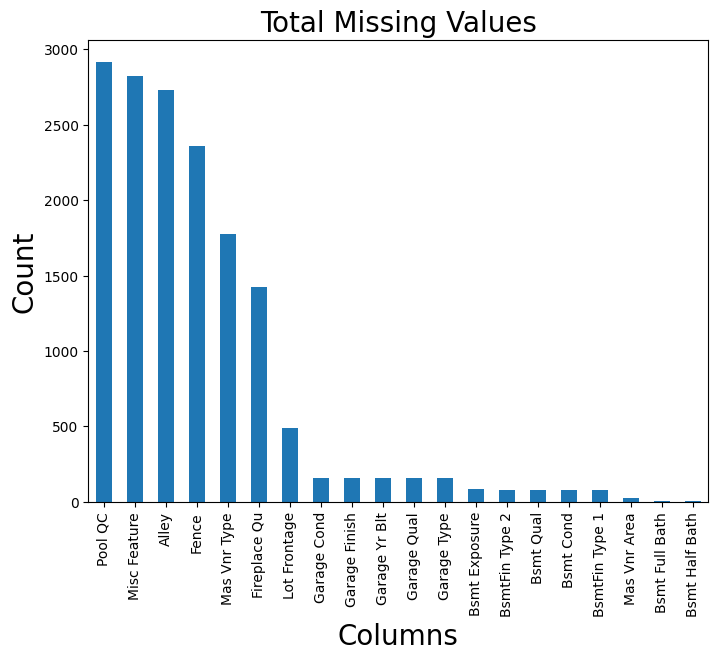

In [9]:
total = housing.isnull().sum().sort_values(ascending=False)
total_select = total.head(20)
total_select.plot(kind="bar", figsize = (8,6), fontsize = 10)

plt.xlabel("Columns", fontsize = 20)
plt.ylabel("Count", fontsize = 20)
plt.title("Total Missing Values", fontsize = 20)

Hay varias opciones para lidiar con los valores faltantes. Usaremos la funci칩n 'Frente del lote'(Lot Frontage) para analizar los valores faltantes.

1. Podemos eliminar los valores faltantes usando el m칠todo `dropna()`.

In [19]:
housing.dropna(subset=["Lot Frontage"])

Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0         1  526301100           20        RL         141.0     31770   Pave   
1         1  526301100           20        RL         141.0     31770   Pave   
2         2  526350040           20        RH          80.0     11622   Pave   
3         3  526351010           20        RL          81.0     14267   Pave   
4         4  526353030           20        RL          93.0     11160   Pave   
...     ...        ...          ...       ...           ...       ...    ...   
2925   2925  923251180           20        RL         160.0     20000   Pave   
2926   2926  923275080           80        RL          37.0      7937   Pave   
2928   2928  923400125           85        RL          62.0     10441   Pave   
2929   2929  924100070           20        RL          77.0     10010   Pave   
2930   2930  924151050           60        RL          74.0      9627   Pave   

     Alley Lot Shape Land Contour  ... Pool Area Pool QC  Fence Misc Feature  \
0      NaN       IR1          Lvl  ...         0     NaN    NaN          NaN   
1      NaN       IR1          Lvl  ...         0     NaN    NaN          NaN   
2      NaN       Reg          Lvl  ...         0     NaN  MnPrv          NaN   
3      NaN       IR1          Lvl  ...         0     NaN    NaN         Gar2   
4      NaN       Reg          Lvl  ...         0     NaN    NaN          NaN   
...    ...       ...          ...  ...       ...     ...    ...          ...   
2925   NaN       Reg          Lvl  ...         0     NaN    NaN          NaN   
2926   NaN       IR1          Lvl  ...         0     NaN  GdPrv          NaN   
2928   NaN       Reg          Lvl  ...         0     NaN  MnPrv         Shed   
2929   NaN       Reg          Lvl  ...         0     NaN    NaN          NaN   
2930   NaN       Reg          Lvl  ...         0     NaN    NaN          NaN   

     Misc Val Mo Sold Yr Sold Sale Type  Sale Condition  SalePrice  
0           0       5    2010       WD           Normal     215000  
1           0       5    2010       WD           Normal     215000  
2           0       6    2010       WD           Normal     105000  
3       12500       6    2010       WD           Normal     172000  
4           0       4    2010       WD           Normal     244000  
...       ...     ...     ...       ...             ...        ...  
2925        0       9    2006       WD          Abnorml     131000  
2926        0       3    2006       WD           Normal     142500  
2928      700       7    2006       WD           Normal     132000  
2929        0       4    2006       WD           Normal     170000  
2930        0      11    2006       WD           Normal     188000  

[2441 rows x 82 columns]

Con este m칠todo, se eliminar치n todas las filas que contengan valores nulos en la funci칩n 'Lot Frontage', por ejemplo.

2. Podemos eliminar todo el atributo (columna), que contiene valores faltantes, usando el m칠todo `drop()`.


In [20]:
housing.drop("Lot Frontage", axis=1)

Order        PID  MS SubClass MS Zoning  Lot Area Street Alley  \
0         1  526301100           20        RL     31770   Pave   NaN   
1         1  526301100           20        RL     31770   Pave   NaN   
2         2  526350040           20        RH     11622   Pave   NaN   
3         3  526351010           20        RL     14267   Pave   NaN   
4         4  526353030           20        RL     11160   Pave   NaN   
...     ...        ...          ...       ...       ...    ...   ...   
2926   2926  923275080           80        RL      7937   Pave   NaN   
2927   2927  923276100           20        RL      8885   Pave   NaN   
2928   2928  923400125           85        RL     10441   Pave   NaN   
2929   2929  924100070           20        RL     10010   Pave   NaN   
2930   2930  924151050           60        RL      9627   Pave   NaN   

     Lot Shape Land Contour Utilities  ... Pool Area Pool QC  Fence  \
0          IR1          Lvl    AllPub  ...         0     NaN    NaN   
1          IR1          Lvl    AllPub  ...         0     NaN    NaN   
2          Reg          Lvl    AllPub  ...         0     NaN  MnPrv   
3          IR1          Lvl    AllPub  ...         0     NaN    NaN   
4          Reg          Lvl    AllPub  ...         0     NaN    NaN   
...        ...          ...       ...  ...       ...     ...    ...   
2926       IR1          Lvl    AllPub  ...         0     NaN  GdPrv   
2927       IR1          Low    AllPub  ...         0     NaN  MnPrv   
2928       Reg          Lvl    AllPub  ...         0     NaN  MnPrv   
2929       Reg          Lvl    AllPub  ...         0     NaN    NaN   
2930       Reg          Lvl    AllPub  ...         0     NaN    NaN   

     Misc Feature Misc Val Mo Sold Yr Sold  Sale Type  Sale Condition  \
0             NaN        0       5    2010        WD           Normal   
1             NaN        0       5    2010        WD           Normal   
2             NaN        0       6    2010        WD           Normal   
3            Gar2    12500       6    2010        WD           Normal   
4             NaN        0       4    2010        WD           Normal   
...           ...      ...     ...     ...        ...             ...   
2926          NaN        0       3    2006        WD           Normal   
2927          NaN        0       6    2006        WD           Normal   
2928         Shed      700       7    2006        WD           Normal   
2929          NaN        0       4    2006        WD           Normal   
2930          NaN        0      11    2006        WD           Normal   

      SalePrice  
0        215000  
1        215000  
2        105000  
3        172000  
4        244000  
...         ...  
2926     142500  
2927     131000  
2928     132000  
2929     170000  
2930     188000  

[2931 rows x 81 columns]

3. Podemos reemplazar los valores faltantes (cero, media, mediana, etc.), usando el m칠todo `fillna()`.


In [10]:
median = housing["Lot Frontage"].median()
median

68.0

In [11]:
housing["Lot Frontage"].fillna(median, inplace = True)

In [12]:
housing.tail()

Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
2926   2926  923275080           80        RL          37.0      7937   Pave   
2927   2927  923276100           20        RL          68.0      8885   Pave   
2928   2928  923400125           85        RL          62.0     10441   Pave   
2929   2929  924100070           20        RL          77.0     10010   Pave   
2930   2930  924151050           60        RL          74.0      9627   Pave   

     Alley Lot Shape Land Contour  ... Pool Area Pool QC  Fence Misc Feature  \
2926   NaN       IR1          Lvl  ...         0     NaN  GdPrv          NaN   
2927   NaN       IR1          Low  ...         0     NaN  MnPrv          NaN   
2928   NaN       Reg          Lvl  ...         0     NaN  MnPrv         Shed   
2929   NaN       Reg          Lvl  ...         0     NaN    NaN          NaN   
2930   NaN       Reg          Lvl  ...         0     NaN    NaN          NaN   

     Misc Val Mo Sold Yr Sold Sale Type  Sale Condition  SalePrice  
2926        0       3    2006       WD           Normal     142500  
2927        0       6    2006       WD           Normal     131000  
2928      700       7    2006       WD           Normal     132000  
2929        0       4    2006       WD           Normal     170000  
2930        0      11    2006       WD           Normal     188000  

[5 rows x 82 columns]

El 칤ndice n.춿 2927, que contiene un valor faltante en el "Frente del lote", ahora ha sido reemplazado por el valor mediano.


<div style="background-color: yellow; color: black; padding: 10px; border-left: 3px solid red;">
  <strong>Advertencia:</strong> Hay formas m치s sofisticadas de lidiar con los datos faltantes, ver <a href="https://scikit-learn.org/stable/modules/impute.html">aqu칤</a>. De hecho, eso espero ver en la entrega 游땔
</div>



## **Manejo de los valores at칤picos**


### Encontrar los valores at칤picos


En estad칤stica, un valor at칤pico es un punto de observaci칩n que est치 distante de otras observaciones. Un valor at칤pico puede deberse a algunos errores en la recopilaci칩n o el registro de datos, o a una alta variabilidad natural de los puntos de datos. La forma de tratar un valor at칤pico depende en gran medida de nuestros datos o del tipo de an치lisis a realizar. Los valores at칤picos pueden afectar notablemente a nuestros modelos y pueden ser una valiosa fuente de informaci칩n, proporcion치ndonos conocimientos sobre comportamientos espec칤ficos.

Hay muchas formas de descubrir valores at칤picos en nuestros datos. Podemos hacer an치lisis univariado (usando an치lisis de una variable) o an치lisis multivariado (usando dos o m치s variables). Una de las formas m치s sencillas de detectar un valor at칤pico es inspeccionar los datos visualmente, haciendo diagramas de caja o diagramas de dispersi칩n.

### An치lisis univariado


Un diagrama de caja es un m칠todo para representar gr치ficamente grupos de datos num칠ricos a trav칠s de sus cuartiles. Los diagramas de caja tambi칠n pueden tener l칤neas que se extienden verticalmente desde las cajas (bigotes) que indican variabilidad fuera de los cuartiles superior e inferior. Los valores at칤picos se pueden representar como puntos individuales. Para obtener m치s informaci칩n sobre los diagramas de caja, haga clic [aqu칤](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.boxplot.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork837-2023-01-01).


Aqu칤, usaremos un diagrama de caja para las caracter칤sticas 'Lot Area' y 'SalePrice'.


<Axes: xlabel='Lot Area'>

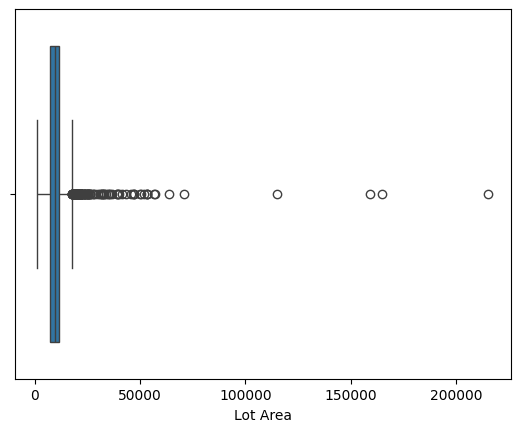

In [13]:
sns.boxplot(x=housing['Lot Area'])

<Axes: xlabel='SalePrice'>

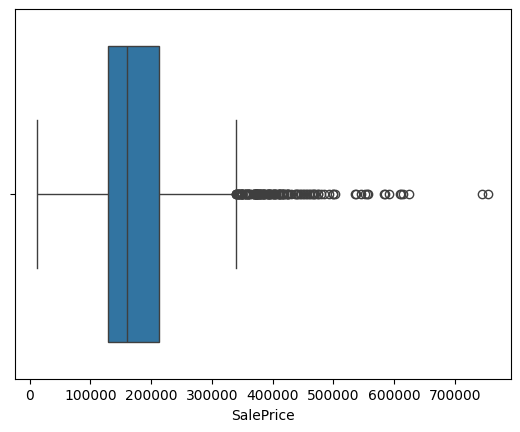

In [14]:
sns.boxplot(x=housing['SalePrice'])

Como podemos ver en estos dos gr치ficos, tenemos algunos puntos que est치n trazados fuera del 치rea del diagrama de caja y que se desv칤an mucho del resto de la poblaci칩n. Eliminarlos o conservarlos depender치 en gran medida del conocimiento de nuestros datos y del tipo de an치lisis a realizar. En este caso, los puntos que est치n fuera de nuestros diagramas de caja en el 'Lot Area' y el 'Sale Price'  podr칤an ser los puntos de datos reales y no es necesario eliminarlos.


### An치lisis bivariado


A continuaci칩n, veremos el an치lisis bivariado de las dos caracter칤sticas, el precio de venta, 'SalePrice', y la superficie habitable del suelo, 'GrLivArea', y trazaremos el diagrama de dispersi칩n de la relaci칩n entre estos dos par치metros.


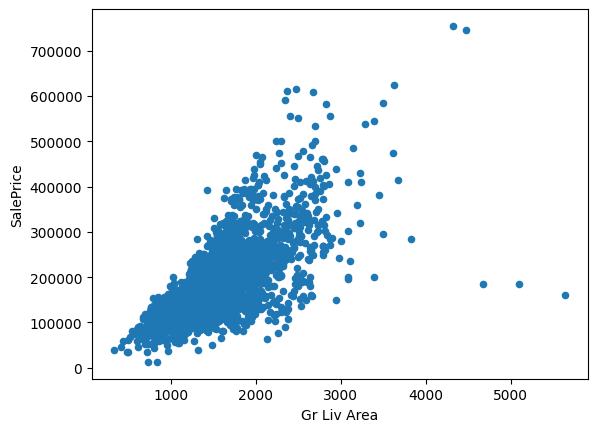

In [15]:
price_area = housing.plot.scatter(x='Gr Liv Area',
                      y='SalePrice')

Del gr치fico anterior se desprenden dos valores superiores a los 5000 pies cuadrados de superficie habitable que se desv칤an del resto de la poblaci칩n y no parecen seguir la tendencia. Se puede especular por qu칠 sucede esto, pero para los fines de esta pr치ctica de laboratorio podemos eliminarlos.

Las otras dos observaciones en la parte superior tambi칠n se desv칤an del resto de los puntos, pero tambi칠n parecen seguir la tendencia, por lo que quiz치s puedan mantenerse.


### Eliminaci칩n de valores at칤picos
#### Selecci칩n Manual


Primero, ordenaremos todos nuestros valores de 'Gr Liv Area' y seleccionaremos solo los dos 칰ltimos.


In [16]:
housing.sort_values(by = 'Gr Liv Area', ascending = False)[:2]

Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
1499   1499  908154235           60        RL         313.0     63887   Pave   
2181   2181  908154195           20        RL         128.0     39290   Pave   

     Alley Lot Shape Land Contour  ... Pool Area Pool QC Fence Misc Feature  \
1499   NaN       IR3          Bnk  ...       480      Gd   NaN          NaN   
2181   NaN       IR1          Bnk  ...         0     NaN   NaN         Elev   

     Misc Val Mo Sold Yr Sold Sale Type  Sale Condition  SalePrice  
1499        0       1    2008       New         Partial     160000  
2181    17000      10    2007       New         Partial     183850  

[2 rows x 82 columns]

Ahora usaremos la funci칩n pandas `drop()` para eliminar estas dos filas.


In [17]:
outliers_dropped = housing.drop(housing.index[[1499,2181]])

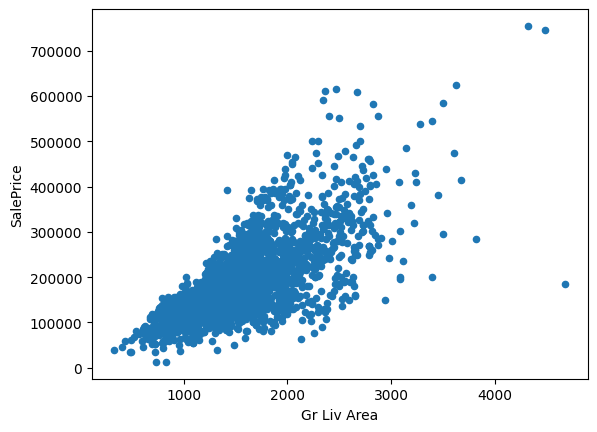

In [18]:
new_plot = outliers_dropped.plot.scatter(x='Gr Liv Area',
                                         y='SalePrice')

Como puedes ver, ya no tenemos los dos 칰ltimos puntos del 'Gr Liv Area'.


#### Uso del Rango Intercuant칤lico

1. Calcular el IQR: El IQR es la diferencia entre el tercer cuartil (Q3) y el primer cuartil (Q1). Esto te da el rango intercuart칤lico, que es una medida de la dispersi칩n alrededor de la mediana (los limites de la caja del gr치fico de dispersi칩n).

2. Determinar los l칤mites: Los l칤mites para los outliers suelen definirse como 1.5 veces el IQR por encima del tercer cuartil y por debajo del primer cuartil. Es decir, cualquier punto de dato fuera de este rango se considera un outlier.


In [19]:
import pandas as pd

# Asumiendo que `housing` es tu DataFrame y que ya est치 cargado

# Paso 1: Calcular el IQR
Q1 = housing['SalePrice'].quantile(0.25)
Q3 = housing['SalePrice'].quantile(0.75)
IQR = Q3 - Q1

# Paso 2: Determinar los l칤mites para los outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Paso 3: Filtrar los outliers
filtered_housing = housing[(housing['SalePrice'] >= lower_bound) & (housing['SalePrice'] <= upper_bound)]

# `filtered_housing` ahora contiene el DataFrame sin los outliers en la columna 'SalePrice'


#### Z-score An치lisis


La puntuaci칩n Z es otra forma de identificar matem치ticamente valores at칤picos. La puntuaci칩n Z es el n칰mero con signo de desviaciones est치ndar por las cuales el valor de una observaci칩n o punto de datos est치 por encima del valor medio de lo que se est치 observando o midiendo. En otras palabras, la puntuaci칩n Z es el valor que cuantifica la relaci칩n entre un punto de datos y una desviaci칩n est치ndar y los valores medios de un grupo de puntos. Los puntos de datos que est칠n demasiado lejos de cero se tratar치n como valores at칤picos. En la mayor칤a de los casos, se utiliza un umbral de 3 o -3. Por ejemplo, si el valor de la puntuaci칩n Z es mayor o menor que 3 o -3 desviaciones est치ndar respectivamente, ese punto de datos se identificar치 como un valor at칤pico.

Para obtener m치s informaci칩n sobre la puntuaci칩n Z, visite esta [p치gina de Wikipedia](https://en.wikipedia.org/wiki/Standard_score?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork837-2023-01-01)


Below, we are using Z-score function from `scipy` library to detect the outliers in our 'Low Qual Fin SF' parameter. To learn more about `scipy.stats`, please visit this [link](https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork837-2023-01-01).


In [20]:
# C치lculo de Z-score para la columna 'SalesPrice'
housing['Z_score'] = stats.zscore(housing['Low Qual Fin SF'])

# Filtrado de outliers basado en Z-score (conservar filas con Z-score entre -3 y 3)
housing_filtered = housing[(housing['Z_score'] > -3) & (housing['Z_score'] < 3)]

# Verificaci칩n de los resultados
result = {
    "original_size": housing.shape[0],
    "filtered_size": housing_filtered.shape[0],
    "removed_outliers": housing.shape[0] - housing_filtered.shape[0]
}

result

{'original_size': 2931, 'filtered_size': 2900, 'removed_outliers': 31}

# Felicitaciones, 춰ya sabes limpiar datos! Al menos lo m치s importante
